In [77]:
import pandas as pd
import datetime
import numpy as np
import time
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor



In [78]:
train_set = pd.read_csv('CHF-EUR train set.csv',parse_dates = True)#import the prepared file.
pd.options.mode.chained_assignment = None # no important

In [79]:
#A function to encode the time into seconds of a day
def time_encode(x):
    x = time.strptime(x.split(',')[0],'%H:%M:%S')
    y = datetime.timedelta(hours=x.tm_hour,minutes=x.tm_min,seconds=x.tm_sec).total_seconds()

    return y
train_set['Numeric time'] = train_set['time'].apply(lambda x: time_encode(x))
train_set['Numeric time' ]

0       11700.0
1       18000.0
2        6300.0
3        7200.0
4       14400.0
         ...   
4905    13500.0
4906    14400.0
4907    18000.0
4908    21600.0
4909    16200.0
Name: Numeric time, Length: 4910, dtype: float64

In [80]:
train_set['strength']  = pd.to_numeric(train_set['strength']) # convert strength to numeric
train_set['strength']= train_set['strength'].fillna(method = 'bfill') #filling 'nan' values by using back fill method
train_set['strength'].isnull().sum() #checking null values
type_e = []
for i in train_set['Event_type']:
    if i == 'AUD_GDP':
        i = 'CHF_GDP'
    else:
        i=i
    type_e.append(i)

train_set['Event_type']=type_e   
train_set

,DATE_TIME,HIGH,LOW,OPEN,CLOSE,Event_value,Event_type,Time duration,Trend,Boundaries,strength,time,Numeric time
0,2011-01-06 3:15:00,1.26923,1.26701,1.26922,1.26729,0.00,CHF_CPI,Long term,UP,0.000313,0.000766,3:15:00,11700.0
1,2011-01-06 5:00:00,1.27168,1.27086,1.27101,1.27102,-0.80,EUDZ_RETAILSALES,Short term,RANGE,0.000313,0.000351,5:00:00,18000.0
2,2011-01-07 1:45:00,1.25369,1.25174,1.25331,1.25206,3.60,CHF_UNEMP,Long term,UP,0.000323,0.000968,1:45:00,6300.0
3,2011-01-07 2:00:00,1.25454,1.25179,1.25205,1.25389,-2.40,EUDG_RETAILSALES,Short term,UP,0.000323,0.001010,2:00:00,7200.0
4,2011-01-07 4:00:00,1.25176,1.25011,1.25126,1.25049,8.70,EURI_UNEMP,Long term,RANGE,0.000313,0.000370,4:00:00,14400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4905,2020-03-13 3:45:00,1.05783,1.05702,1.05778,1.05736,0.00,EUDF_CPI,Short term,RANGE,0.000137,0.000353,3:45:00,13500.0
4906,2020-03-13 4:00:00,1.05756,1.05569,1.05734,1.05601,0.70,EUDS_CPI,Short term,DOWN,0.000137,-0.000491,4:00:00,14400.0
4907,2020-03-16 5:00:00,1.05496,1.05425,1.05484,1.05468,-0.10,EUDI_CPI,Long term,RANGE,0.000132,0.000393,5:00:00,18000.0
4908,2020-03-18 6:00:00,1.05593,1.05510,1.05539,1.05527,1.20,EUDZ_CPI,Short term,DOWN,0.000134,-0.000247,6:00:00,21600.0


In [81]:
train_set.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4910 entries, 0 to 4909
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DATE_TIME      4910 non-null   object 
 1   HIGH           4910 non-null   float64
 2   LOW            4910 non-null   float64
 3   OPEN           4910 non-null   float64
 4   CLOSE          4910 non-null   float64
 5   Event_value    4910 non-null   float64
 6   Event_type     4910 non-null   object 
 7   Time duration  4910 non-null   object 
 8   Trend          4910 non-null   object 
 9   Boundaries     4910 non-null   float64
 10  strength       4910 non-null   float64
 11  time           4910 non-null   object 
 12  Numeric time   4910 non-null   float64
dtypes: float64(8), object(5)
memory usage: 498.8+ KB


In [82]:
train_set.describe() #Aggrigation behaviour of the features 


,HIGH,LOW,OPEN,CLOSE,Event_value,Boundaries,strength,Numeric time
count,4910.000000,4910.000000,4910.000000,4910.000000,4910.000000,4910.000000,4910.000000,4910.000000
mean,1.159169,1.158374,1.158777,1.158758,0.644061,0.000168,0.000094,11254.949084
std,0.066782,0.066747,0.066766,0.066761,13.325878,0.000486,0.000441,6259.197913
min,0.991100,0.984970,0.984970,0.990670,-129.300000,0.000006,-0.002658,1800.000000
25%,1.093510,1.092675,1.093195,1.093010,-0.100000,0.000069,-0.000256,7200.000000
50%,1.160270,1.159310,1.159870,1.159730,0.200000,0.000107,0.000301,10800.000000
75%,1.216438,1.215943,1.216045,1.216250,1.100000,0.000172,0.000353,14400.000000
max,1.322180,1.314860,1.322120,1.315580,132.100000,0.020806,0.003204,32400.000000


In [83]:
train_set.corr() #checking colleration features

,HIGH,LOW,OPEN,CLOSE,Event_value,Boundaries,strength,Numeric time
HIGH,1.000000,0.999919,0.999964,0.999957,0.034163,-0.048532,-0.006384,-0.011293
LOW,0.999919,1.000000,0.999957,0.999969,0.033853,-0.053206,-0.006045,-0.012460
OPEN,0.999964,0.999957,1.000000,0.999943,0.034053,-0.049702,-0.006752,-0.011927
CLOSE,0.999957,0.999969,0.999943,1.000000,0.034054,-0.050998,-0.005646,-0.011928
Event_value,0.034163,0.033853,0.034053,0.034054,1.000000,0.005821,-0.004224,0.029143
Boundaries,-0.048532,-0.053206,-0.049702,-0.050998,0.005821,1.000000,0.060575,0.002725
strength,-0.006384,-0.006045,-0.006752,-0.005646,-0.004224,0.060575,1.000000,-0.024652
Numeric time,-0.011293,-0.012460,-0.011927,-0.011928,0.029143,0.002725,-0.024652,1.000000


AxesSubplot(0.125,0.1925;0.62x0.62)


,HIGH,Event_value,Numeric time
0,1.26923,0.00,11700.0
1,1.27168,-0.80,18000.0
2,1.25369,3.60,6300.0
3,1.25454,-2.40,7200.0
4,1.25176,8.70,14400.0
...,...,...,...
4905,1.05783,0.00,13500.0
4906,1.05756,0.70,14400.0
4907,1.05496,-0.10,18000.0
4908,1.05593,1.20,21600.0


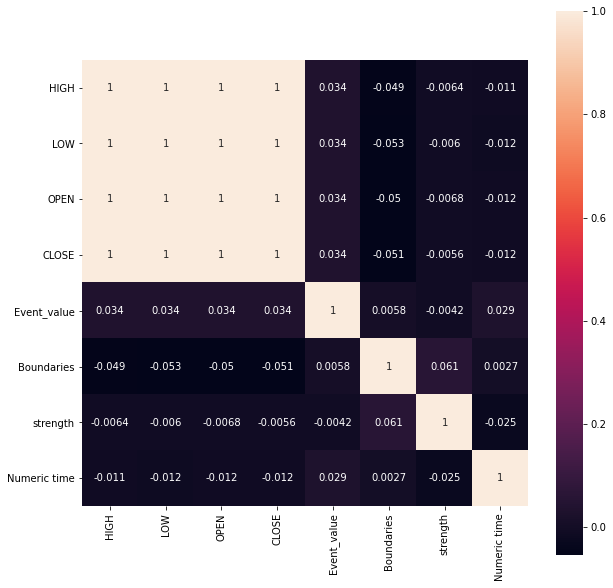

In [84]:
# plot the heatmap for visualize the correlation
fig, ax = plt.subplots(figsize=(10,10))
heatmap_1 = sns.heatmap(train_set.corr(),annot=True,square =True,ax=ax)
plt.savefig("figure 2.jpg")
print(heatmap_1)
nor = train_set[['HIGH','Event_value','Numeric time']]  # select only non-categorical columns to normalize 
nor


In [85]:
ms = MinMaxScaler().fit(nor) # create the min max scaleing object
scaled = ms.fit_transform(nor)#normalizing the columns
scaled = pd.DataFrame(scaled,columns = ['HIGH','Event_value','Numeric time'])
scaled 

,HIGH,Event_value,Numeric time
0,0.840069,0.494644,0.323529
1,0.847469,0.491584,0.529412
2,0.793132,0.508416,0.147059
3,0.795699,0.485463,0.176471
4,0.787302,0.527927,0.411765
...,...,...,...
4905,0.201552,0.494644,0.382353
4906,0.200737,0.497322,0.411765
4907,0.192884,0.494262,0.529412
4908,0.195814,0.499235,0.647059


Index(['CHF_CPI', 'CHF_GDP', 'CHF_IR', 'CHF_PPI', 'CHF_RETAILSALES',
       'CHF_UNEMP', 'EUDF_CPI', 'EUDF_GDP', 'EUDF_PAYROLL', 'EUDF_PPI',
       'EUDF_UNEMP', 'EUDG_CPI', 'EUDG_GDP', 'EUDG_PPI', 'EUDG_RETAILSALES',
       'EUDG_UNEMP', 'EUDI_CPI', 'EUDI_GDP', 'EUDI_PPI', 'EUDI_RETAILSALES',
       'EUDS_CPI', 'EUDS_GDP', 'EUDS_PPI', 'EUDS_RETAILSALES', 'EUDS_UNEMP',
       'EUDZ_CPI', 'EUDZ_GDP', 'EUDZ_IR', 'EUDZ_RETAILSALES', 'EUDZ_UNEMP',
       'EURI_UNEMP'],
      dtype='object')


,HIGH,Event_value,Numeric time,CHF_CPI,CHF_GDP,CHF_IR,CHF_PPI,CHF_RETAILSALES,CHF_UNEMP,EUDF_CPI,...,EUDS_GDP,EUDS_PPI,EUDS_RETAILSALES,EUDS_UNEMP,EUDZ_CPI,EUDZ_GDP,EUDZ_IR,EUDZ_RETAILSALES,EUDZ_UNEMP,EURI_UNEMP
0,0.840069,0.494644,0.323529,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.847469,0.491584,0.529412,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.793132,0.508416,0.147059,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0.795699,0.485463,0.176471,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.787302,0.527927,0.411765,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4905,0.201552,0.494644,0.382353,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4906,0.200737,0.497322,0.411765,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4907,0.192884,0.494262,0.529412,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4908,0.195814,0.499235,0.647059,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


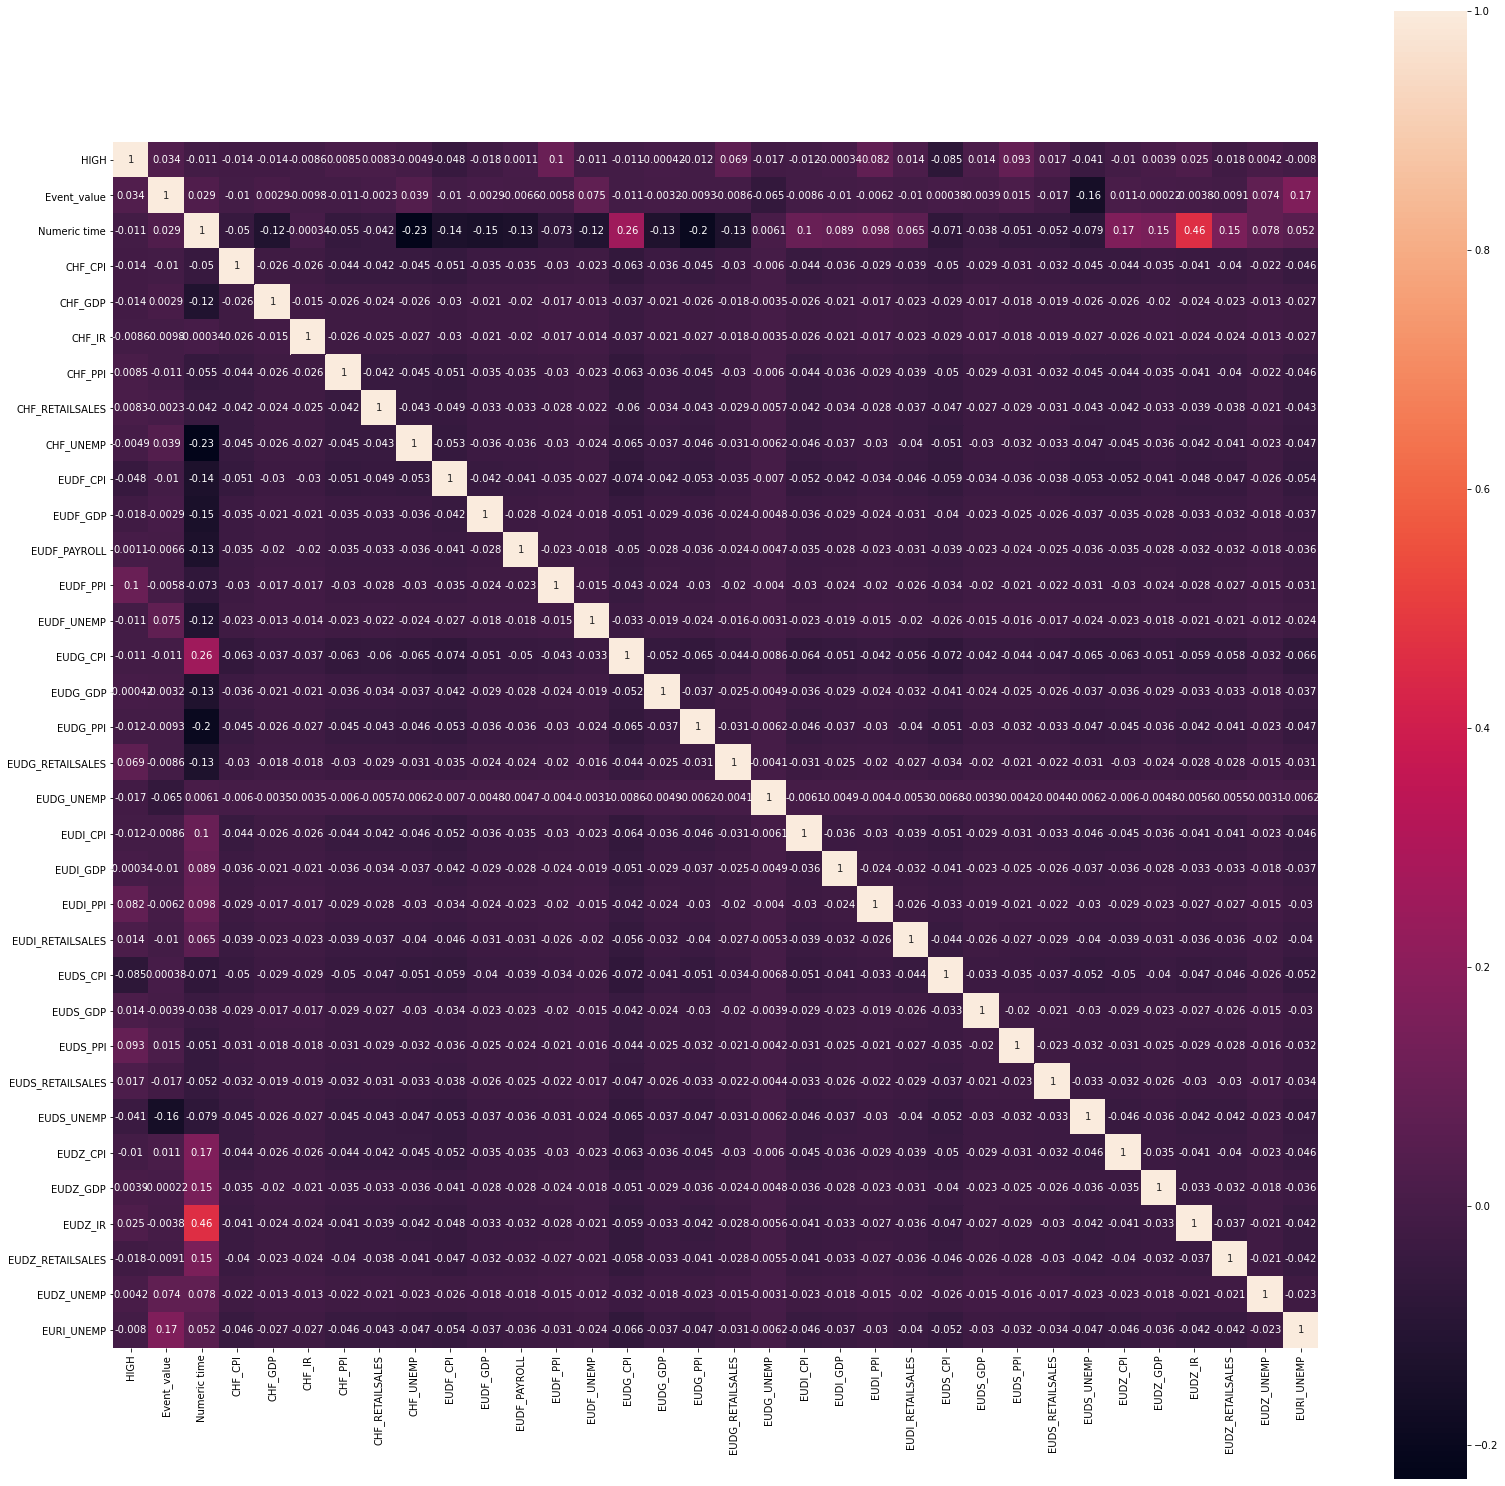

In [86]:
le = LabelEncoder() # label encoding object for trend and duration
dummies = pd.get_dummies(train_set['Event_type']) #encoding method for event type
encoding_event_order= (dummies.columns)
X = scaled.join(dummies)
y = le.fit_transform(train_set['Time duration'])#select the time duration as the target variable, named as y

fig, ax = plt.subplots(figsize=(27,27))
hmap_2 = sns.heatmap(X.corr(),annot=True,square =True,ax=ax)# heatmap for the correlation after including encoded categories
plt.savefig("figure 3.jpg")
 
print(encoding_event_order) #event type encoding sequence

X


In [87]:
temp = train_set.groupby('Event_type')['strength'].mean()
temp_dict= dict(temp)
train_set['Event_type'] = train_set['Event_type'].apply(lambda x: temp_dict.get(x))
 
X_mod =  train_set[['HIGH','Event_value','Event_type','strength']]
X_mod

,HIGH,Event_value,Event_type,strength
0,1.26923,0.00,0.000241,0.000766
1,1.27168,-0.80,0.000199,0.000351
2,1.25369,3.60,0.000186,0.000968
3,1.25454,-2.40,0.000150,0.001010
4,1.25176,8.70,0.000044,0.000370
...,...,...,...,...
4905,1.05783,0.00,0.000053,0.000353
4906,1.05756,0.70,0.000062,-0.000491
4907,1.05496,-0.10,0.000086,0.000393
4908,1.05593,1.20,0.000067,-0.000247


In [88]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2,random_state = 92 ) #92 - 0.73

In [89]:
#predict time duration using kNN classification
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [90]:
print("Accuracy of knn model:",metrics.accuracy_score(y_test, y_pred))

Accuracy of knn model: 0.7342158859470469


In [91]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2,random_state = 85) #85

In [92]:
#predict time duration using random Forest
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [93]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) #accuracy of the random forest classifier when using for time duration

Accuracy: 0.9022403258655805


In [94]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2,random_state = 92) #92

In [95]:
#predict time duration using svm classification algorithm
s = svm.SVC(kernel ='poly', degree = 20) #20
s.fit(X_train,y_train)
y_pred = s.predict(X_test)
print("Accuracy of svm:",metrics.accuracy_score(y_test, y_pred))


Accuracy of svm: 0.7138492871690427


In [96]:
y= le.fit_transform(train_set['Trend']) #encoding the Trend column
y

array([2, 1, 2, ..., 1, 0, 0])

In [97]:
#predict trend using kNN classification
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("Accuracy of knn:",metrics.accuracy_score(y_test, y_pred))


Accuracy of knn: 0.7342158859470469


In [98]:
#predict trend using svm classification algorithm
s = svm.SVC(kernel ='poly', degree = 25) #20
s.fit(X_train,y_train)
y_pred = s.predict(X_test)
print("Accuracy of svm:",metrics.accuracy_score(y_test, y_pred))


Accuracy of svm: 0.714867617107943


In [99]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2,random_state = 10)#splitting the train set -10
y_test_trend = y_test
   #predict the trend using random Forest

clf=RandomForestClassifier(n_estimators=2)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
y_pred
print("Accuracy of random Forest:",metrics.accuracy_score(y_test, y_pred))


Accuracy of random Forest: 0.6965376782077393


In [100]:
# Test different method of RF for trend perdiction.

In [101]:
#Experiment

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
print("Accuracy of knn:",metrics.accuracy_score(y_test, y_pred))

s = svm.SVC()
s.fit(X_train,y_train)
y_pred_svm = s.predict(X_test)
print("Accuracy of svm:",metrics.accuracy_score(y_test, y_pred))

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2,random_state = 90)
y_test_trend = y_test
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred_rf =clf.predict(X_test)
print("Accuracy of random Forest:",metrics.accuracy_score(y_test, y_pred))

Accuracy of knn: 0.6965376782077393
Accuracy of svm: 0.6965376782077393
Accuracy of random Forest: 0.37169042769857435


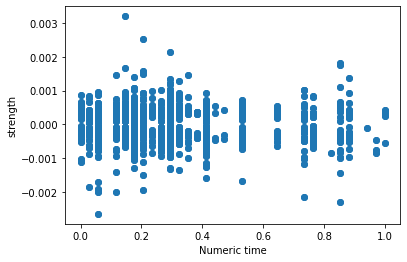

<Figure size 432x288 with 0 Axes>

In [102]:
# behaviour of event time vs. strength
y= train_set['strength']
plt.scatter(X['Numeric time'],y)
plt.xlabel('Numeric time')
plt.ylabel('strength')
plt.show()
plt.savefig("figure 4.jpg")


In [103]:
X_linear = train_set[['HIGH','Event_value','Event_type']]
X_linear['Event_type'] = le.fit_transform(X_linear['Event_type'])
X_linear.describe()


,HIGH,Event_value,Event_type
count,4910.000000,4910.000000,4910.000000
mean,1.159169,0.644061,14.216293
std,0.066782,13.325878,8.457632
min,0.991100,-129.300000,0.000000
25%,1.093510,-0.100000,7.000000
50%,1.160270,0.200000,14.000000
75%,1.216438,1.100000,22.000000
max,1.322180,132.100000,30.000000


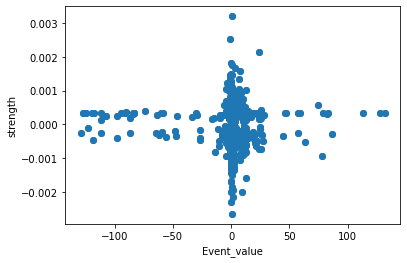

In [104]:
#identify the behavior of  Event value and strength
plt.scatter(X_linear['Event_value'],y)
plt.xlabel('Event_value')
plt.ylabel('streng')
plt.show()


In [105]:

y= train_set['strength'] #when trend is DOWn strength is minus. I got the abs value for having a good distribution. At the end again this will be converted to minus again
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2,random_state = 42)
regression_model = LinearRegression() # creating the linear regression model
regression_model.fit(X_train,y_train)
y_pred = regression_model.predict(X_test)

print('R^2:',metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
 


X

R^2: 0.0042156538924568165
Mean Absolute Error: 0.00035873721984909165
Mean Squared Error: 2.0896931906640872e-07
Root Mean Squared Error: 0.00045713162116223016


,HIGH,Event_value,Numeric time,CHF_CPI,CHF_GDP,CHF_IR,CHF_PPI,CHF_RETAILSALES,CHF_UNEMP,EUDF_CPI,...,EUDS_GDP,EUDS_PPI,EUDS_RETAILSALES,EUDS_UNEMP,EUDZ_CPI,EUDZ_GDP,EUDZ_IR,EUDZ_RETAILSALES,EUDZ_UNEMP,EURI_UNEMP
0,0.840069,0.494644,0.323529,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.847469,0.491584,0.529412,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.793132,0.508416,0.147059,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0.795699,0.485463,0.176471,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.787302,0.527927,0.411765,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4905,0.201552,0.494644,0.382353,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4906,0.200737,0.497322,0.411765,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4907,0.192884,0.494262,0.529412,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4908,0.195814,0.499235,0.647059,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [106]:
pd.DataFrame(y_pred) # this is predicted output for x_test

,0
0,-0.000046
1,0.000075
2,0.000207
3,0.000154
4,0.000126
...,...
977,0.000023
978,0.000083
979,0.000046
980,0.000105


In [107]:
y_test # this is the real output for x_test


1718   -0.000269
1412   -0.000565
4208   -0.000249
2589    0.000326
3352    0.000322
          ...   
3353    0.000370
3606    0.000393
1541   -0.000151
964     0.000358
168    -0.001913
Name: strength, Length: 982, dtype: float64

# linear regression method 2

In [108]:
X = X_mod.drop(columns= 'strength')
y = X_mod['strength']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2,random_state = 42) #0.5 and 0.1 without change


regression_model.fit(X_train,y_train)
y_pred = regression_model.predict(X_test)

print('R^2:',metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
 

R^2: 0.02255854730494944
Mean Absolute Error: 0.00035562098077365295
Mean Squared Error: 2.0511998967988075e-07
Root Mean Squared Error: 0.00045290174395765


In [109]:
const = regression_model.intercept_
print('constant value :',const)
coef = regression_model.coef_
print('coefficient of indipendent variables :',coef)

constant value : 0.0001102144605374782
coefficient of indipendent variables : [-9.14493373e-05  1.33459284e-08  9.60077984e-01]


In [110]:
pd.DataFrame(y_pred)

,0
0,-0.000083
1,0.000145
2,0.000201
3,0.000134
4,0.000140
...,...
977,0.000041
978,0.000096
979,0.000061
980,0.000106


In [111]:
y_test

1718   -0.000269
1412   -0.000565
4208   -0.000249
2589    0.000326
3352    0.000322
          ...   
3353    0.000370
3606    0.000393
1541   -0.000151
964     0.000358
168    -0.001913
Name: strength, Length: 982, dtype: float64

In [112]:
#find the strength value when an event increased
def increasing_strength(HIGH,event_value,event_typep,): #p= increasing_percentage
    init_strength = coef[0]*HIGH+ coef[0]*event_value + coef[2]*event_type + const
    increased_strength = coef[0]*HIGH + coef[0]*(event_value + event_value*p) + coef[2]*event_type +const
    return increased_strength

In [113]:
print(pd.Series(temp_dict))

CHF_CPI             0.000241
CHF_GDP             0.000024
CHF_IR              0.000140
CHF_PPI             0.000149
CHF_RETAILSALES     0.000142
CHF_UNEMP           0.000186
EUDF_CPI            0.000053
EUDF_GDP            0.000069
EUDF_PAYROLL        0.000095
EUDF_PPI            0.000147
EUDF_UNEMP          0.000132
EUDG_CPI            0.000077
EUDG_GDP            0.000036
EUDG_PPI            0.000106
EUDG_RETAILSALES    0.000150
EUDG_UNEMP          0.000284
EUDI_CPI            0.000086
EUDI_GDP            0.000039
EUDI_PPI            0.000074
EUDI_RETAILSALES    0.000066
EUDS_CPI            0.000062
EUDS_GDP           -0.000097
EUDS_PPI            0.000112
EUDS_RETAILSALES    0.000102
EUDS_UNEMP          0.000062
EUDZ_CPI            0.000067
EUDZ_GDP            0.000072
EUDZ_IR             0.000042
EUDZ_RETAILSALES    0.000199
EUDZ_UNEMP          0.000112
EURI_UNEMP          0.000044
dtype: float64


# Combining accuracy for trend

In [114]:
trend_pred = []
for i in range(982):
    if [i] ==y_test_trend[i] or y_pred_rf[i] ==y_test_trend[i] or y_pred_svm[i] ==y_test_trend[i]:
        trend_pred.append(y_test_trend[i])
    else:
        trend_pred.append(y_pred_svm[i])

print("Accuracy of the combining model:",metrics.accuracy_score(y_test_trend, trend_pred))
    
    

Accuracy of the combining model: 0.9164969450101833
